# **Environment Setup**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile

## Unzip file (Dataset A)
#location = '/content/drive/MyDrive/Capstone Project/archive.zip'
#zip_ref = zipfile.ZipFile(location, 'r')
#zip_ref.extractall('/content/drive/MyDrive/Capstone Project/archive')

## Unzip file (Dataset B)
#location = '/content/drive/MyDrive/Capstone Project/new dataset/archive.zip'
#zip_ref = zipfile.ZipFile(location, 'r')
#zip_ref.extractall('/content/drive/MyDrive/Capstone Project/new dataset/archive')

OSError: ignored

In [ ]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from os import listdir

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import Sequential

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

## **Import Dataframe from CSV (Dataset A)**

In [ ]:
# Import data label CSV
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/archive/full_df.csv')

# Show all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
# Dataframe slicing
df_1 = df.loc[:, ['filename','labels']]
df_1.head()

,filename,labels
0,0_right.jpg,['N']
1,1_right.jpg,['N']
2,2_right.jpg,['D']
3,4_right.jpg,['D']
4,5_right.jpg,['D']


# **ALL CLASSIFICATION**

In [ ]:
from collections import Counter
labels_count = Counter(label for lbs in df_1['labels'] for label in lbs)
labels_count

Counter({"'": 12784,
         'A': 266,
         'C': 293,
         'D': 1608,
         'G': 284,
         'H': 128,
         'M': 232,
         'N': 2873,
         'O': 708,
         '[': 6392,
         ']': 6392})

In [ ]:
# assign directory
directory_train = '/content/drive/MyDrive/Capstone Project/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/Capstone Project/archive/ODIR-5K/ODIR-5K/testing_images'
 
# iterate over files in
# that directory
i = 0
j = 0

# Counting data
for image_name in os.listdir(directory_train):
  i += 1

for image_name in os.listdir(directory_test):
  j += 1

print(i)
print(j)

6392
1000


In [ ]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    df_1,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_1,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

NameError: ignored



## **Standard CNN**







In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 512x512 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    class_weight=train_class_weights,
                    verbose = 2)

Epoch 1/25
20/20 - 89s - loss: 4.0352 - accuracy: 0.1969 - val_loss: 2.0740 - val_accuracy: 0.2729 - 89s/epoch - 4s/step
Epoch 2/25
20/20 - 14s - loss: 2.0842 - accuracy: 0.0828 - val_loss: 2.0726 - val_accuracy: 0.1458 - 14s/epoch - 699ms/step
Epoch 3/25
20/20 - 14s - loss: 2.1053 - accuracy: 0.0703 - val_loss: 2.0481 - val_accuracy: 0.1167 - 14s/epoch - 693ms/step
Epoch 4/25
20/20 - 14s - loss: 2.2189 - accuracy: 0.0656 - val_loss: 2.0644 - val_accuracy: 0.0437 - 14s/epoch - 691ms/step
Epoch 5/25
20/20 - 14s - loss: 2.1475 - accuracy: 0.0516 - val_loss: 2.0557 - val_accuracy: 0.2146 - 14s/epoch - 690ms/step
Epoch 6/25
20/20 - 14s - loss: 2.1426 - accuracy: 0.0688 - val_loss: 2.3543 - val_accuracy: 0.0958 - 14s/epoch - 686ms/step
Epoch 7/25
20/20 - 14s - loss: 2.2542 - accuracy: 0.0703 - val_loss: 1.9984 - val_accuracy: 0.2396 - 14s/epoch - 696ms/step
Epoch 8/25
20/20 - 17s - loss: 1.9729 - accuracy: 0.0584 - val_loss: 2.0328 - val_accuracy: 0.2208 - 17s/epoch - 852ms/step
Epoch 9/25


## **Transfer Learning**



In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-18 15:17:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.251.120.128, 142.251.161.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   242MB/s    in 0.3s    

2022-05-18 15:17:22 (242 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_103 (Conv2D)            (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 255, 255, 32  96         ['conv2d_103[0][0]']             
 ormalization)                  )                                                      

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 30, 30, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Dense layer with 512 hidden units
x = layers.Dense(512, activation='relu')(x)
# Dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_103 (Conv2D)            (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 255, 255, 32  96         ['conv2d_103[0][0]']             
 ormalization)                  )                                                             

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(img_iter, epochs=25, steps_per_epoch=10, verbose = 1)

Epoch 1/25
10/10 [==============================] - 13s 921ms/step - loss: 2.1170 - accuracy: 0.4344
Epoch 2/25
10/10 [==============================] - 9s 916ms/step - loss: 1.4046 - accuracy: 0.5031
Epoch 3/25
10/10 [==============================] - 9s 916ms/step - loss: 1.4256 - accuracy: 0.4938
Epoch 4/25
10/10 [==============================] - 9s 892ms/step - loss: 1.4709 - accuracy: 0.4519
Epoch 5/25


KeyboardInterrupt: ignored

# **Cataract and Diabetes**

In [ ]:
# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat_augment = pd.concat([df_cat,df_cat,df_cat,df_cat,df_cat,df_cat,df_cat,df_cat,df_cat], ignore_index=True, sort=False)
df_cat_augment = shuffle(df_cat_augment)
#df_cat_augment.head()

# Dataframe slicing (Diabetes)
df_dbt = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
#df_norm.tail()

# Merged Dataframe (Diabetes)
df_2 = pd.concat([df_dbt, df_norm], ignore_index=True, sort=False)
df_2 = shuffle(df_2)

# Merged Dataframe (Cataract)
df_3 = pd.concat([df_cat_augment, df_norm], ignore_index=True, sort=False)
df_3 = shuffle(df_3)

# Split Train and Test from Dataframe
# train, val = train_test_split(df_3, test_size=0.2)

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/data/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/data/archive/ODIR-5K/ODIR-5K/testing_images'

# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
datagen = ImageDataGenerator(rescale=1./255., 
                              preprocessing_function=to_grayscale_then_rgb,
                              rotation_range = 30,
                              horizontal_flip = True,
                              vertical_flip = True,
                              validation_split=0.2
                              )

train_generator = datagen.flow_from_dataframe(
    df_3,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_3,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='binary',
    subset='validation'
)

Found 4643 validated image filenames belonging to 2 classes.
Found 1160 validated image filenames belonging to 2 classes.


## **Standard CNN**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 512x512 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

In [ ]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=25,
                    steps_per_epoch=50,
                    validation_steps = 15,
                    verbose = 1)

Epoch 1/25
50/50 [==============================] - 394s 8s/step - loss: 0.6658 - accuracy: 0.5919 - val_loss: 0.6400 - val_accuracy: 0.5896
Epoch 2/25
50/50 [==============================] - 284s 6s/step - loss: 0.6477 - accuracy: 0.6206 - val_loss: 0.6109 - val_accuracy: 0.6938
Epoch 3/25
50/50 [==============================] - 228s 5s/step - loss: 0.6078 - accuracy: 0.6737 - val_loss: 0.5496 - val_accuracy: 0.7500
Epoch 4/25
50/50 [==============================] - 199s 4s/step - loss: 0.5607 - accuracy: 0.7194 - val_loss: 0.4991 - val_accuracy: 0.7625
Epoch 5/25
50/50 [==============================] - 179s 4s/step - loss: 0.5433 - accuracy: 0.7325 - val_loss: 0.4840 - val_accuracy: 0.7958
Epoch 6/25
50/50 [==============================] - 169s 3s/step - loss: 0.4992 - accuracy: 0.7756 - val_loss: 0.4364 - val_accuracy: 0.8292
Epoch 7/25
50/50 [==============================] - 155s 3s/step - loss: 0.4521 - accuracy: 0.7931 - val_loss: 0.4577 - val_accuracy: 0.8167
Epoch 8/25
50

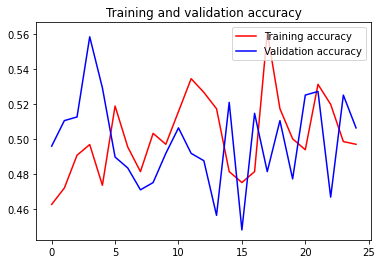

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Transfer Learning InceptionV3 (Mix 7)**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-29 11:02:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.214.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   329MB/s    in 0.3s    

2022-05-29 11:02:00 (329 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# Choose `mixed_7` as the last layer
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 30, 30, 768)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )        

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 30, 30, 768)


### **Cataract Only**

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
# Diabetes data
datagen = ImageDataGenerator(rescale=1./255., 
                              preprocessing_function=to_grayscale_then_rgb,
                              validation_split=0.2
                              )

train_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='binary',
    subset='validation'
)

Found 3585 validated image filenames belonging to 2 classes.
Found 896 validated image filenames belonging to 2 classes.


In [ ]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=25,
                    steps_per_epoch=25,
                    validation_steps = 15,
                    verbose = 1)

Epoch 1/25
25/25 [==============================] - 143s 6s/step - loss: 1.5212 - accuracy: 0.5775 - val_loss: 0.9394 - val_accuracy: 0.6313
Epoch 2/25
25/25 [==============================] - 94s 4s/step - loss: 1.1058 - accuracy: 0.6099 - val_loss: 1.2841 - val_accuracy: 0.4125
Epoch 3/25
25/25 [==============================] - 85s 3s/step - loss: 0.9173 - accuracy: 0.6255 - val_loss: 0.5935 - val_accuracy: 0.6417
Epoch 4/25
25/25 [==============================] - 64s 3s/step - loss: 0.7514 - accuracy: 0.6281 - val_loss: 0.8097 - val_accuracy: 0.6333
Epoch 5/25
25/25 [==============================] - 61s 2s/step - loss: 0.6955 - accuracy: 0.6800 - val_loss: 1.0532 - val_accuracy: 0.6187
Epoch 6/25
25/25 [==============================] - 49s 2s/step - loss: 0.7420 - accuracy: 0.6288 - val_loss: 0.5584 - val_accuracy: 0.7104
Epoch 7/25
25/25 [==============================] - 49s 2s/step - loss: 0.7786 - accuracy: 0.6567 - val_loss: 0.8840 - val_accuracy: 0.6167
Epoch 8/25
25/25 [=

### **Diabetes and Cataract**





In [ ]:
# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat_augment = pd.concat([df_cat,df_cat,df_cat,df_cat,df_cat,df_cat], ignore_index=True, sort=False)
df_cat_augment = shuffle(df_cat_augment)
#df_cat_augment.head()

# Dataframe slicing (Diabetes)
df_dbt = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Normal)
norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
df_norm, trash = train_test_split(norm, test_size=0.3)

#df_norm.tail()

# Merged Dataframe (Diabetes and Cataract)
df_merged = pd.concat([df_cat_augment, df_dbt, df_norm], ignore_index=True, sort=False)
df_merged = shuffle(df_merged)

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/data/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/data/archive/ODIR-5K/ODIR-5K/testing_images'

# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
# Imgage data generator
datagen = ImageDataGenerator(rescale=1./255., 
                            preprocessing_function=to_grayscale_then_rgb,
                            rotation_range = 30,
                            horizontal_flip = True,
                            validation_split=0.2
                            )

train_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 4302 validated image filenames belonging to 3 classes.
Found 1075 validated image filenames belonging to 3 classes.


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=25,
                    steps_per_epoch=45,
                    validation_steps = 15,
                    verbose = 1)

Epoch 1/25
45/45 [==============================] - 487s 11s/step - loss: 2.0220 - accuracy: 0.6090 - val_loss: 0.6326 - val_accuracy: 0.7104
Epoch 2/25
45/45 [==============================] - 327s 7s/step - loss: 1.1961 - accuracy: 0.6493 - val_loss: 1.6282 - val_accuracy: 0.5958
Epoch 3/25
45/45 [==============================] - 248s 6s/step - loss: 0.9017 - accuracy: 0.6507 - val_loss: 0.9002 - val_accuracy: 0.6938
Epoch 4/25
45/45 [==============================] - 215s 5s/step - loss: 0.8512 - accuracy: 0.6491 - val_loss: 0.5410 - val_accuracy: 0.6979
Epoch 5/25
45/45 [==============================] - 185s 4s/step - loss: 0.7104 - accuracy: 0.6604 - val_loss: 0.5608 - val_accuracy: 0.7729
Epoch 6/25
45/45 [==============================] - 164s 4s/step - loss: 0.6990 - accuracy: 0.6948 - val_loss: 0.5483 - val_accuracy: 0.6875
Epoch 7/25
45/45 [==============================] - 155s 3s/step - loss: 0.6430 - accuracy: 0.6828 - val_loss: 0.7008 - val_accuracy: 0.6896
Epoch 8/25
4

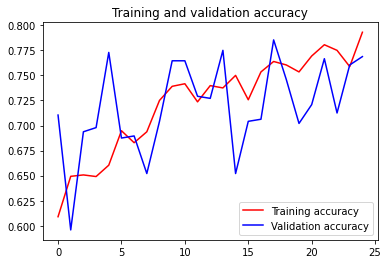

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Transfer Learning InceptionV3 (Mix 10)**

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 2048)


In [ ]:
# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat_augment = pd.concat([df_cat,df_cat,df_cat,df_cat,df_cat,df_cat], ignore_index=True, sort=False)
df_cat_augment = shuffle(df_cat_augment)
#df_cat_augment.head()

# Dataframe slicing (Diabetes)
df_dbt = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Normal)
norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
df_norm, trash = train_test_split(norm, test_size=0.3)

#df_norm.tail()

# Merged Dataframe (Diabetes and Cataract)
df_merged = pd.concat([df_cat_augment, df_dbt, df_norm], ignore_index=True, sort=False)
df_merged = shuffle(df_merged)

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/data/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/data/archive/ODIR-5K/ODIR-5K/testing_images'

# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

# Image data Generator
datagen = ImageDataGenerator(rescale=1./255., 
                              preprocessing_function=to_grayscale_then_rgb,
                              rotation_range = 30,
                              horizontal_flip = True,
                              validation_split=0.2
                              )

train_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 4302 validated image filenames belonging to 3 classes.
Found 1075 validated image filenames belonging to 3 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-31 09:17:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   161MB/s    in 0.5s    

2022-05-31 09:17:36 (161 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 14, 14, 2048)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )       

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)              
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=25,
                    steps_per_epoch=45,
                    validation_steps = 15,
                    verbose = 1)

Epoch 1/25
45/45 [==============================] - 505s 11s/step - loss: 5.5560 - accuracy: 0.5879 - val_loss: 4.6724 - val_accuracy: 0.6542
Epoch 2/25
45/45 [==============================] - 327s 7s/step - loss: 2.3047 - accuracy: 0.6465 - val_loss: 1.2978 - val_accuracy: 0.6667
Epoch 3/25
45/45 [==============================] - 252s 6s/step - loss: 1.5474 - accuracy: 0.6779 - val_loss: 2.3002 - val_accuracy: 0.6562
Epoch 4/25
45/45 [==============================] - 209s 5s/step - loss: 1.3441 - accuracy: 0.6610 - val_loss: 0.9760 - val_accuracy: 0.7063
Epoch 5/25
45/45 [==============================] - 188s 4s/step - loss: 0.8628 - accuracy: 0.7159 - val_loss: 0.4759 - val_accuracy: 0.7625
Epoch 6/25
45/45 [==============================] - 168s 4s/step - loss: 0.9016 - accuracy: 0.6786 - val_loss: 0.9162 - val_accuracy: 0.7083
Epoch 7/25
45/45 [==============================] - 155s 3s/step - loss: 0.8298 - accuracy: 0.6779 - val_loss: 1.4143 - val_accuracy: 0.6479
Epoch 8/25
4

## **Tranfer Leanning VGG16**

In [ ]:
# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat_augment = pd.concat([df_cat,df_cat,df_cat,df_cat,df_cat,df_cat], ignore_index=True, sort=False)
df_cat_augment = shuffle(df_cat_augment)
#df_cat_augment.head()

# Dataframe slicing (Diabetes)
df_dbt = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Normal)
norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
df_norm, trash = train_test_split(norm, test_size=0.3)

#df_norm.tail()

# Merged Dataframe (Diabetes and Cataract)
df_merged = pd.concat([df_cat_augment, df_dbt, df_norm], ignore_index=True, sort=False)
df_merged = shuffle(df_merged)

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/data/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/data/archive/ODIR-5K/ODIR-5K/testing_images'

# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
# Image data Generator
datagen = ImageDataGenerator(rescale=1./255., 
                              preprocessing_function=to_grayscale_then_rgb,
                              rotation_range = 30,
                              horizontal_flip = True,
                              validation_split=0.2
                              )

train_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_merged,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 4302 validated image filenames belonging to 3 classes.
Found 1075 validated image filenames belonging to 3 classes.


In [ ]:
vgg = VGG16(input_shape=(512, 512, 3), weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
inp = vgg.input

x = Flatten()(vgg.output) 
x = Dense(512, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

model_new = Model(inp, outputs = prediction)

In [ ]:
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

model_new.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    steps_per_epoch=50,
                    validation_steps = 15,
                    verbose = 1)

Epoch 1/50
50/50 [==============================] - 245s 5s/step - loss: 1.1384 - accuracy: 0.5256 - val_loss: 0.6478 - val_accuracy: 0.6646
Epoch 2/50
50/50 [==============================] - 209s 4s/step - loss: 0.8667 - accuracy: 0.5944 - val_loss: 1.1206 - val_accuracy: 0.6396
Epoch 3/50
50/50 [==============================] - 196s 4s/step - loss: 0.8132 - accuracy: 0.6252 - val_loss: 1.4653 - val_accuracy: 0.3604
Epoch 4/50
50/50 [==============================] - 187s 4s/step - loss: 0.8053 - accuracy: 0.6369 - val_loss: 0.6396 - val_accuracy: 0.6521
Epoch 5/50
50/50 [==============================] - 180s 4s/step - loss: 0.8138 - accuracy: 0.6394 - val_loss: 0.6822 - val_accuracy: 0.6792
Epoch 6/50
50/50 [==============================] - 181s 4s/step - loss: 0.7424 - accuracy: 0.6750 - val_loss: 0.5679 - val_accuracy: 0.7167
Epoch 7/50
50/50 [==============================] - 176s 4s/step - loss: 0.7809 - accuracy: 0.6363 - val_loss: 0.7922 - val_accuracy: 0.6687
Epoch 8/50
50

KeyboardInterrupt: ignored

# **Cataract, Normal, Diabetes, Glaucoma, Age related Macular Degeneration (With Class Weight)**

## **Preparing data (Oversampling)**

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/Capstone Project/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/Capstone Project/archive/ODIR-5K/ODIR-5K/testing_images'

# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat = pd.concat([df_cat, df_cat, df_cat, df_cat], ignore_index=True, sort=False)

# Dataframe slicing (Normal)
df_norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
# df_norm.tail()

# Dataframe slicing (Diabetes)
df_diabet = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df.loc[df['labels'] == "['G']", ['filename','labels']]
df_gl = pd.concat([df_gl, df_gl, df_gl, df_gl], ignore_index=True, sort=False)

# Dataframe slicing (Age related Macular Degeneration)
df_age = df.loc[df['labels'] == "['A']", ['filename','labels']]
df_age = pd.concat([df_age, df_age, df_age, df_age], ignore_index=True, sort=False)
df_age = shuffle(df_age)

print('Cataract Train : ',df_cat.count())
print('Normal Train   : ',df_norm.count())
print('Diabetes Train : ',df_diabet.count())
print('Glaucoma Train : ',df_gl.count())
print('Age Train      : ',df_age.count())

Cataract Train :  filename    1172
labels      1172
dtype: int64
Normal Train   :  filename    2873
labels      2873
dtype: int64
Diabetes Train :  filename    1608
labels      1608
dtype: int64
Glaucoma Train :  filename    1136
labels      1136
dtype: int64
Age Train      :  filename    1064
labels      1064
dtype: int64


In [ ]:
# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
# Merged Dataframe (Cataract)
df_2 = pd.concat([df_cat[:500], df_norm[:500], df_diabet[:500], df_gl[:500], df_age[:500]], ignore_index=True, sort=False)
df_2 = shuffle(df_2)

# Split Train and Test from Dataframe

### **Data without grayscale**

In [ ]:
# Image data Generator
datagen = ImageDataGenerator(rescale=1./255.,
                            rotation_range = 20,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            zoom_range = 0.2,
                            fill_mode = 'nearest',
                            horizontal_flip = True,
                            validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 2000 validated image filenames belonging to 5 classes.
Found 500 validated image filenames belonging to 5 classes.


### **Data with grayscale**

In [ ]:
# Image data Generator
datagen = ImageDataGenerator(rescale=1./255.,
                            preprocessing_function=to_grayscale_then_rgb,
                            rotation_range = 20,
                            validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 2000 validated image filenames belonging to 5 classes.
Found 500 validated image filenames belonging to 5 classes.


## **Preparing data (Undersampling)**

In [ ]:
# Directory
directory_train = '/content/drive/MyDrive/Capstone Project/archive/preprocessed_images'
directory_test = '/content/drive/MyDrive/Capstone Project/archive/ODIR-5K/ODIR-5K/testing_images'

# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]
df_cat_augment = shuffle(df_cat)
# df_cat_augment.head()

# Dataframe slicing (Normal)
df_norm = df.loc[df['labels'] == "['N']", ['filename','labels']]
# df_norm.tail()

# Dataframe slicing (Diabetes)
df_diabet = df.loc[df['labels'] == "['D']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df.loc[df['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Age related Macular Degeneration)
df_age = df.loc[df['labels'] == "['A']", ['filename','labels']]

print('Cataract Train : ',df_cat.count())
print('Normal Train   : ',df_norm.count())
print('Diabetes Train : ',df_diabet.count())
print('Glaucoma Train : ',df_gl.count())
print('Age Train      : ',df_age.count())

Cataract Train :  filename    293
labels      293
dtype: int64
Normal Train   :  filename    2873
labels      2873
dtype: int64
Diabetes Train :  filename    1608
labels      1608
dtype: int64
Glaucoma Train :  filename    284
labels      284
dtype: int64
Age Train      :  filename    266
labels      266
dtype: int64


In [ ]:
# Preprocessing Image (Grayscale)
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

In [ ]:
# Merged Dataframe (Cataract)
df_2 = pd.concat([df_cat_augment[:266], df_norm[:266], df_diabet[:266], df_gl[:266], df_age[:266]], ignore_index=True, sort=False)
df_2 = shuffle(df_2)

# Split Train and Test from Dataframe
train, val = train_test_split(df_2, test_size=0.2)

In [ ]:
print('Cataract Train Count: ',train[train['labels']=="['C']"].labels.count())
print('Normal Train Count  : ',train[train['labels']=="['N']"].labels.count())
print('Diabetes Train Count: ',train[train['labels']=="['D']"].labels.count())
print('Glaucoma Train Count: ',train[train['labels']=="['G']"].labels.count())
print('Age Train Count     : ',train[train['labels']=="['A']"].labels.count())
print('Cataract Validation Count: ',val[val['labels']=="['C']"].labels.count())
print('Normal Validation Count  : ',val[val['labels']=="['N']"].labels.count())
print('Diabetes Validation Count: ',val[val['labels']=="['D']"].labels.count())
print('Glaucoma Validation Count: ',val[val['labels']=="['G']"].labels.count())
print('Age Validation Count     : ',val[val['labels']=="['A']"].labels.count())

Cataract Train Count:  206
Normal Train Count  :  216
Diabetes Train Count:  214
Glaucoma Train Count:  220
Age Train Count     :  208
Cataract Validation Count:  60
Normal Validation Count  :  50
Diabetes Validation Count:  52
Glaucoma Validation Count:  46
Age Validation Count     :  58


### **Data without grayscale**

In [ ]:
# Image data Generator
traingen = ImageDataGenerator(rescale=1./255.,
                              rotation_range = 20,
                              fill_mode = 'nearest')

train_generator = traingen.flow_from_dataframe(
    train,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

valgen = ImageDataGenerator(rescale=1./255.)

validation_generator = valgen.flow_from_dataframe(
    val,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

Found 1064 validated image filenames belonging to 5 classes.
Found 266 validated image filenames belonging to 5 classes.


### **Data with grayscale**

In [ ]:
# Image data Generator
traingen = ImageDataGenerator(rescale=1./255.,
                              preprocessing_function=to_grayscale_then_rgb,
                              rotation_range = 20,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              zoom_range = 0.2,
                              fill_mode = 'nearest',
                              horizontal_flip = True)

train_generator = traingen.flow_from_dataframe(
    train,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

valgen = ImageDataGenerator(rescale=1./255.,
                            preprocessing_function=to_grayscale_then_rgb,)

validation_generator = valgen.flow_from_dataframe(
    val,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

Found 1064 validated image filenames belonging to 5 classes.
Found 266 validated image filenames belonging to 5 classes.


## **Model InceptionV3 (Mix 7 - Oversampling)**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-04 06:14:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  64.4MB/s    in 1.3s    

2022-06-04 06:14:53 (64.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 30, 30, 768)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )        

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 30, 30, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **With Grayscale**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=20,
                    validation_steps=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 9.6563 - accuracy: 0.4790
Epoch 1: val_accuracy improved from -inf to 0.64375, saving model to CapstoneModel.h5
63/63 [==============================] - 583s 9s/step - loss: 9.6563 - accuracy: 0.4790 - val_loss: 2.0403 - val_accuracy: 0.6438
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 1.0235 - accuracy: 0.7350
Epoch 2: val_accuracy did not improve from 0.64375
63/63 [==============================] - 199s 3s/step - loss: 1.0235 - accuracy: 0.7350 - val_loss: 1.8433 - val_accuracy: 0.6313
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 1.0430 - accuracy: 0.7405
Epoch 3: val_accuracy did not improve from 0.64375
63/63 [==============================] - 180s 3s/step - loss: 1.0430 - accuracy: 0.7405 - val_loss: 1.8200 - val_accuracy: 0.6344
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.8550
Epoch 4: val_accuracy improved from 0.64375 to

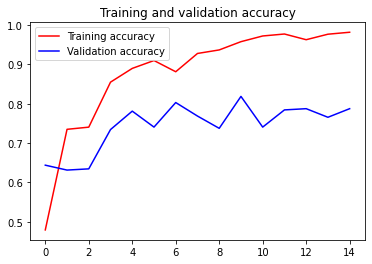

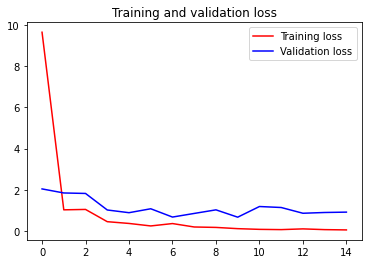

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  x = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  x = np.true_divide(x, 255)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])

# {0:'Age', 1:'Cataract', 2:'Diabetes', 3:'Glaucoma', 4:'Normal'}

Saving cataract_022.png to cataract_022 (9).png


InvalidArgumentError: ignored

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppzpawn9k/assets


In [ ]:
tf.keras.backend.clear_session()

### **With Only Weight Class**

In [ ]:
# Imbalanced handling (Class Weight)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(train.labels),
                                                 y=train.labels)
train_classes = train_generator.classes
class_weights = dict(zip(np.unique(train_classes), class_weights))
print(class_weights)

{0: 4.03696682464455, 1: 3.5198347107438015, 2: 0.6649492583918813, 3: 3.8026785714285714, 4: 0.37018687527162103}


In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=32,
                    validation_steps = 15,
                    callbacks=[checkpoint,earlystop],
                    class_weight=class_weights,
                    verbose = 1)

Epoch 1/30
134/134 [==============================] - ETA: 0s - loss: 8.8554 - accuracy: 0.3522
Epoch 1: val_accuracy improved from -inf to 0.37708, saving model to CapstoneModel.h5
134/134 [==============================] - 86s 621ms/step - loss: 8.8554 - accuracy: 0.3522 - val_loss: 1.9678 - val_accuracy: 0.3771
Epoch 2/30
134/134 [==============================] - ETA: 0s - loss: 1.3877 - accuracy: 0.4503
Epoch 2: val_accuracy did not improve from 0.37708
134/134 [==============================] - 67s 495ms/step - loss: 1.3877 - accuracy: 0.4503 - val_loss: 2.1980 - val_accuracy: 0.2292
Epoch 3/30
134/134 [==============================] - ETA: 0s - loss: 0.8328 - accuracy: 0.5328
Epoch 3: val_accuracy improved from 0.37708 to 0.57083, saving model to CapstoneModel.h5
134/134 [==============================] - 86s 640ms/step - loss: 0.8328 - accuracy: 0.5328 - val_loss: 0.9913 - val_accuracy: 0.5708
Epoch 4/30
134/134 [==============================] - ETA: 0s - loss: 0.7524 - accur

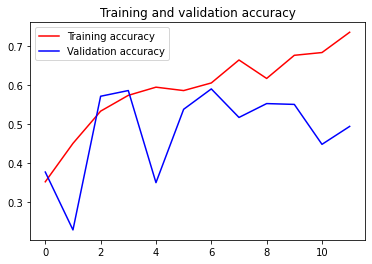

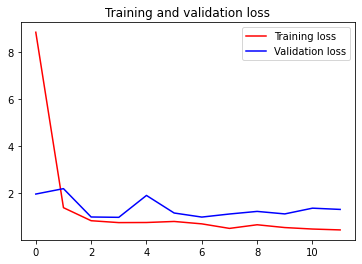

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
tf.keras.backend.clear_session()

### **Without Grayscale and Weight Class**


In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=32,
                    validation_steps = 15,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/30
134/134 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.8004
Epoch 1: val_accuracy improved from -inf to 0.67708, saving model to CapstoneModel.h5
134/134 [==============================] - 96s 694ms/step - loss: 0.5016 - accuracy: 0.8004 - val_loss: 1.1537 - val_accuracy: 0.6771
Epoch 2/30
134/134 [==============================] - ETA: 0s - loss: 0.5318 - accuracy: 0.7906
Epoch 2: val_accuracy did not improve from 0.67708
134/134 [==============================] - 86s 642ms/step - loss: 0.5318 - accuracy: 0.7906 - val_loss: 1.0358 - val_accuracy: 0.6771
Epoch 3/30
134/134 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8457
Epoch 3: val_accuracy did not improve from 0.67708
134/134 [==============================] - 80s 595ms/step - loss: 0.3795 - accuracy: 0.8457 - val_loss: 1.1487 - val_accuracy: 0.6062
Epoch 4/30
134/134 [==============================] - ETA: 0s - loss: 0.3545 - accuracy: 0.8587
Epoch 4: val_accuracy did 

In [ ]:
tf.keras.backend.clear_session()

## **Model InceptionV3 (Mix 10 - Undersampling)**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-04 14:32:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  36.5MB/s    in 2.3s    

2022-06-04 14:32:59 (36.5 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 14, 14, 2048)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 2048)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(128, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(64, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=100,verbose=1)

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **With Grayscale and Weight Class**

In [ ]:
# Imbalanced handling (Class Weight)
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(train.labels),
                                                 y=train.labels)
train_classes = train_generator.classes
class_weights = dict(zip(np.unique(train_classes), class_weights))
print(class_weights)

{0: 0.9585585585585585, 1: 1.0037735849056604, 2: 0.9851851851851852, 3: 0.9990610328638497, 4: 1.0587064676616915}


In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    class_weight=class_weights,
                    verbose = 1)

Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 20.9819 - accuracy: 0.3524
Epoch 1: val_accuracy improved from -inf to 0.45113, saving model to CapstoneModel.h5
34/34 [==============================] - 59s 1s/step - loss: 20.9819 - accuracy: 0.3524 - val_loss: 7.0154 - val_accuracy: 0.4511
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 5.6586 - accuracy: 0.5160
Epoch 2: val_accuracy improved from 0.45113 to 0.51880, saving model to CapstoneModel.h5
34/34 [==============================] - 45s 1s/step - loss: 5.6586 - accuracy: 0.5160 - val_loss: 4.1298 - val_accuracy: 0.5188
Epoch 3/30
34/34 [==============================] - ETA: 0s - loss: 2.1857 - accuracy: 0.6015
Epoch 3: val_accuracy improved from 0.51880 to 0.59774, saving model to CapstoneModel.h5
34/34 [==============================] - 45s 1s/step - loss: 2.1857 - accuracy: 0.6015 - val_loss: 1.4179 - val_accuracy: 0.5977
Epoch 4/30
34/34 [==============================] - ETA: 0s - los

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

KeyError: ignored

### **Without Grayscale and Weight Class**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=20,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose=1)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 15.7411 - accuracy: 0.3214 
Epoch 1: val_accuracy improved from -inf to 0.39474, saving model to CapstoneModel.h5
34/34 [==============================] - 1230s 36s/step - loss: 15.7411 - accuracy: 0.3214 - val_loss: 5.4370 - val_accuracy: 0.3947
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 3.3571 - accuracy: 0.4286
Epoch 2: val_accuracy did not improve from 0.39474
34/34 [==============================] - 66s 2s/step - loss: 3.3571 - accuracy: 0.4286 - val_loss: 4.6211 - val_accuracy: 0.3684
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 2.7986 - accuracy: 0.4633
Epoch 3: val_accuracy improved from 0.39474 to 0.47744, saving model to CapstoneModel.h5
34/34 [==============================] - 77s 2s/step - loss: 2.7986 - accuracy: 0.4633 - val_loss: 1.6029 - val_accuracy: 0.4774
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 1.6030 - accuracy: 0.5122
Epoch

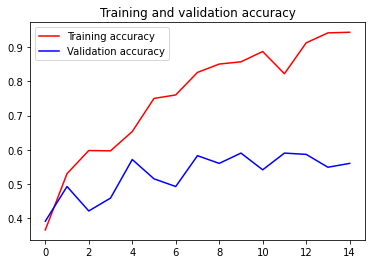

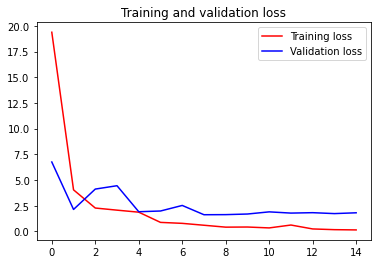

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('models/wpod_net_all_in_one.h5')
tf.saved_model.save(model, "models")
print("successfully saved keras model file to tensorflow model file")

## **Model InceptionV3 (Mix 7 - Undersampling)**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-04 07:57:51--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.195.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   257MB/s    in 0.3s    

2022-06-04 07:57:52 (257 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 30, 30, 768)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 255, 255, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 255, 255, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )        

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 30, 30, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 255, 255, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 255, 255, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **Withoout Grayscale**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 17.2082 - accuracy: 0.2961
Epoch 1: val_accuracy improved from -inf to 0.45865, saving model to CapstoneModel.h5
34/34 [==============================] - 99s 3s/step - loss: 17.2082 - accuracy: 0.2961 - val_loss: 3.6356 - val_accuracy: 0.4586
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 3.4640 - accuracy: 0.4051
Epoch 2: val_accuracy improved from 0.45865 to 0.58647, saving model to CapstoneModel.h5
34/34 [==============================] - 97s 3s/step - loss: 3.4640 - accuracy: 0.4051 - val_loss: 1.6298 - val_accuracy: 0.5865
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 2.2767 - accuracy: 0.4680
Epoch 3: val_accuracy improved from 0.58647 to 0.63158, saving model to CapstoneModel.h5
34/34 [==============================] - 95s 3s/step - loss: 2.2767 - accuracy: 0.4680 - val_loss: 1.1625 - val_accuracy: 0.6316
Epoch 4/50
34/34 [==============================] - ETA: 0s - los

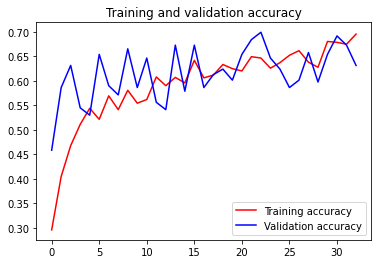

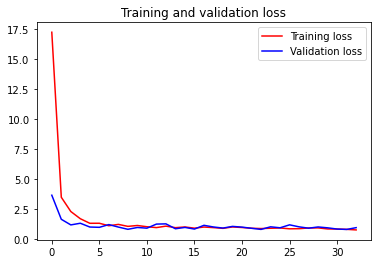

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(512, 512))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])

# {0:'Age', 1:'Cataract', 2:'Diabetes', 3:'Glaucoma', 4:'Normal'}

### **Without Grayscale and Weight Class**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 15.9870 - accuracy: 0.3684
Epoch 1: val_accuracy improved from -inf to 0.42857, saving model to CapstoneModel.h5
34/34 [==============================] - 42s 1s/step - loss: 15.9870 - accuracy: 0.3684 - val_loss: 7.8852 - val_accuracy: 0.4286
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 3.6732 - accuracy: 0.5583
Epoch 2: val_accuracy improved from 0.42857 to 0.54135, saving model to CapstoneModel.h5
34/34 [==============================] - 38s 1s/step - loss: 3.6732 - accuracy: 0.5583 - val_loss: 3.1799 - val_accuracy: 0.5414
Epoch 3/30
34/34 [==============================] - ETA: 0s - loss: 1.8915 - accuracy: 0.6429
Epoch 3: val_accuracy improved from 0.54135 to 0.57143, saving model to CapstoneModel.h5
34/34 [==============================] - 38s 1s/step - loss: 1.8915 - accuracy: 0.6429 - val_loss: 2.1341 - val_accuracy: 0.5714
Epoch 4/30
34/34 [==============================] - ETA: 0s - los

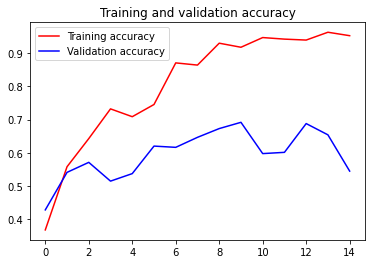

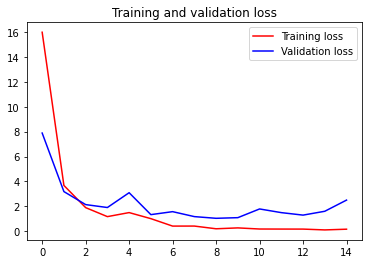

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Model VGG16**

In [ ]:
vgg = VGG16(input_shape=(512, 512, 3), weights='imagenet', include_top=False)

# Freeze the weights of the layers.
for layer in vgg.layers:
  layer.trainable = False

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
inp = vgg.input

x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

model_new = Model(inp, outputs = prediction)

In [ ]:
# for l, layer in enumerate(model_new.layers[:-1]):
#     layer.trainable = False

# for l, layer in enumerate(model_new.layers[-1:]):
#     layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

### **Without Grayscale (Undersampling)**

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 2.3315 - accuracy: 0.2378
Epoch 1: val_accuracy improved from -inf to 0.33459, saving model to CapstoneModel.h5
34/34 [==============================] - 106s 3s/step - loss: 2.3315 - accuracy: 0.2378 - val_loss: 1.4518 - val_accuracy: 0.3346
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 1.5906 - accuracy: 0.2970
Epoch 2: val_accuracy did not improve from 0.33459
34/34 [==============================] - 77s 2s/step - loss: 1.5906 - accuracy: 0.2970 - val_loss: 1.5545 - val_accuracy: 0.3120
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 1.5199 - accuracy: 0.3459
Epoch 3: val_accuracy improved from 0.33459 to 0.36842, saving model to CapstoneModel.h5
34/34 [==============================] - 81s 2s/step - loss: 1.5199 - accuracy: 0.3459 - val_loss: 1.4574 - val_accuracy: 0.3684
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss: 1.4397 - accuracy: 0.3590
Epoch 4: v

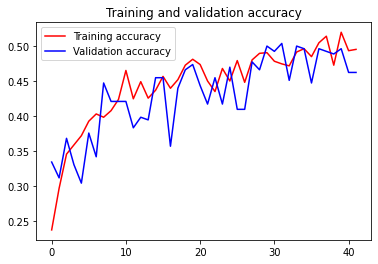

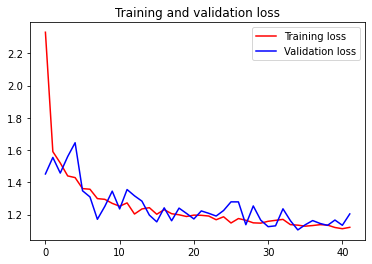

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### **Oversampling**

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=32,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 2.0254 - accuracy: 0.2670 
Epoch 1: val_accuracy improved from -inf to 0.21400, saving model to CapstoneModel.h5
63/63 [==============================] - 1576s 25s/step - loss: 2.0254 - accuracy: 0.2670 - val_loss: 1.6058 - val_accuracy: 0.2140
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 1.5376 - accuracy: 0.3245
Epoch 2: val_accuracy improved from 0.21400 to 0.36600, saving model to CapstoneModel.h5
63/63 [==============================] - 163s 3s/step - loss: 1.5376 - accuracy: 0.3245 - val_loss: 1.3844 - val_accuracy: 0.3660
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 1.4039 - accuracy: 0.3705
Epoch 3: val_accuracy improved from 0.36600 to 0.38000, saving model to CapstoneModel.h5
63/63 [==============================] - 162s 3s/step - loss: 1.4039 - accuracy: 0.3705 - val_loss: 1.2825 - val_accuracy: 0.3800
Epoch 4/50
63/63 [==============================] - ETA: 0s -

## **Model VGG19 (Undersampling)**


In [ ]:
vgg = VGG19(input_shape=(512, 512, 3), weights='imagenet', include_top=False)

# Freeze the weights of the layers.
for layer in vgg.layers:
  layer.trainable = False

vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
inp = vgg.input

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

model_new = Model(inp, outputs = prediction)

In [ ]:
#for l, layer in enumerate(model_new.layers[:-1]):
#    layer.trainable = False

#for l, layer in enumerate(model_new.layers[-1:]):
#    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

### **Without Grayscale No Augment**

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 5.0412 - accuracy: 0.2679
Epoch 1: val_accuracy improved from -inf to 0.33083, saving model to CapstoneModel.h5
34/34 [==============================] - 318s 9s/step - loss: 5.0412 - accuracy: 0.2679 - val_loss: 1.9833 - val_accuracy: 0.3308
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 1.8877 - accuracy: 0.3994
Epoch 2: val_accuracy improved from 0.33083 to 0.33459, saving model to CapstoneModel.h5
34/34 [==============================] - 44s 1s/step - loss: 1.8877 - accuracy: 0.3994 - val_loss: 1.9289 - val_accuracy: 0.3346
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 1.5560 - accuracy: 0.4568
Epoch 3: val_accuracy improved from 0.33459 to 0.36090, saving model to CapstoneModel.h5
34/34 [==============================] - 45s 1s/step - loss: 1.5560 - accuracy: 0.4568 - val_loss: 1.7231 - val_accuracy: 0.3609
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss

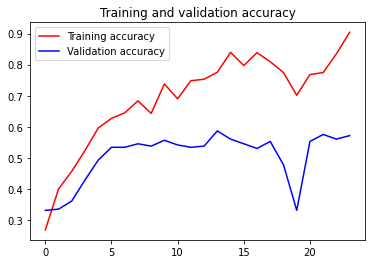

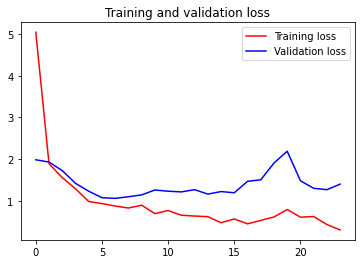

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### **Without Grayscale Rotation**

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 4.7287 - accuracy: 0.2425
Epoch 1: val_accuracy improved from -inf to 0.30451, saving model to CapstoneModel.h5
34/34 [==============================] - 87s 3s/step - loss: 4.7287 - accuracy: 0.2425 - val_loss: 1.5001 - val_accuracy: 0.3045
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 1.8429 - accuracy: 0.4088
Epoch 2: val_accuracy improved from 0.30451 to 0.49248, saving model to CapstoneModel.h5
34/34 [==============================] - 81s 2s/step - loss: 1.8429 - accuracy: 0.4088 - val_loss: 1.3511 - val_accuracy: 0.4925
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 1.4031 - accuracy: 0.4577
Epoch 3: val_accuracy improved from 0.49248 to 0.49624, saving model to CapstoneModel.h5
34/34 [==============================] - 83s 2s/step - loss: 1.4031 - accuracy: 0.4577 - val_loss: 1.2213 - val_accuracy: 0.4962
Epoch 4/50
34/34 [==============================] - ETA: 0s - loss:

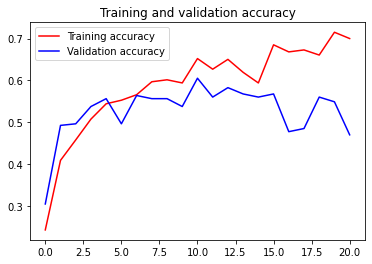

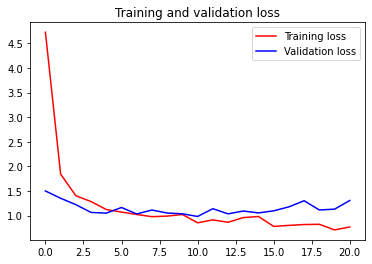

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# **New Dataset**

In [ ]:
# assign directory
directory_1 = '/content/drive/MyDrive/Capstone Project/archive/ODIR-5K/ODIR-5K/training_images'
directory_C = '/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/cataract'
directory_G = '/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/glaucoma'
directory_N = '/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/normal'
 
# Create buffer variable and iterate over files in that directory
dir_1_counter = 0
dir_23_counter = 0

# Counting data
for image_name in os.listdir(directory_1):
  dir_1_counter += 1

for image_name in os.listdir(directory_C):
  dir_23_counter += 1

for image_name in os.listdir(directory_G):
  dir_23_counter += 1

for image_name in os.listdir(directory_N):
  dir_23_counter += 1

print('Total Images in Data 1   :', dir_1_counter)
print('Total Images in Data 2&3 :', dir_23_counter)

Total Images in Data 1   : 7000
Total Images in Data 2&3 : 669


In [ ]:
# Collect filename and label from directory
filenames = []
labels = []

for image_name in os.listdir(directory_C):
  filenames.append('/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/cataract/'+image_name)
  labels.append("['C']")

for image_name in os.listdir(directory_G):
  filenames.append('/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/glaucoma/'+image_name)
  labels.append("['G']")

for image_name in os.listdir(directory_N):
  filenames.append('/content/drive/MyDrive/Capstone Project/new dataset/archive/dataset/normal/'+image_name)
  labels.append("['N']")

In [ ]:
# Create New DataFrame
df_23 = pd.DataFrame({'filename': filenames, 'labels': labels})
display(df_23)

,filename,labels
0,/content/drive/MyDrive/Capstone Project/new da...,['C']
1,/content/drive/MyDrive/Capstone Project/new da...,['C']
2,/content/drive/MyDrive/Capstone Project/new da...,['C']
3,/content/drive/MyDrive/Capstone Project/new da...,['C']
4,/content/drive/MyDrive/Capstone Project/new da...,['C']
5,/content/drive/MyDrive/Capstone Project/new da...,['C']
6,/content/drive/MyDrive/Capstone Project/new da...,['C']
7,/content/drive/MyDrive/Capstone Project/new da...,['C']
8,/content/drive/MyDrive/Capstone Project/new da...,['C']
9,/content/drive/MyDrive/Capstone Project/new da...,['C']


### Data Distribution Before Merge Dataset

In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_23.loc[df_23['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_23.loc[df_23['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_23.loc[df_23['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  100
Normal   :  300
Glaucoma :  269


### Upscaling Dataset 2&3 with Random Data from Data 1 to Avoid Imbalanced Dataset

In [ ]:
# Sampling data from data 1
df_C_1 = df_1[df_1.labels == "['C']"].sample(200, random_state=42)
filename_c = df_C_1['filename'].values
labels_c = df_C_1['labels'].values

df_G_1 = df_1[df_1.labels == "['G']"].sample(31, random_state=42)
filename_g = df_G_1['filename'].values
labels_g = df_G_1['labels'].values

In [ ]:
# Append file directory to filename
for x in range(len(filename_c)):
  filename_c[x] = directory_1 + '/' + filename_c[x]

for x in range(len(filename_g)):
  filename_g[x] = directory_1 + '/' + filename_g[x]

In [ ]:
# Create DataFrame from Data 1 Sample
df_sample_1 = pd.DataFrame({'filename':np.concatenate((filename_c, filename_g)), 'labels':np.concatenate((labels_c, labels_g))})
df_sample_1.tail()

,filename,labels
226,/content/drive/MyDrive/Capstone Project/archiv...,['G']
227,/content/drive/MyDrive/Capstone Project/archiv...,['G']
228,/content/drive/MyDrive/Capstone Project/archiv...,['G']
229,/content/drive/MyDrive/Capstone Project/archiv...,['G']
230,/content/drive/MyDrive/Capstone Project/archiv...,['G']


In [ ]:
df_merged = pd.concat([df_23, df_sample_1], ignore_index=True)
df_merged

,filename,labels
0,/content/drive/MyDrive/Capstone Project/new da...,['C']
1,/content/drive/MyDrive/Capstone Project/new da...,['C']
2,/content/drive/MyDrive/Capstone Project/new da...,['C']
3,/content/drive/MyDrive/Capstone Project/new da...,['C']
4,/content/drive/MyDrive/Capstone Project/new da...,['C']
5,/content/drive/MyDrive/Capstone Project/new da...,['C']
6,/content/drive/MyDrive/Capstone Project/new da...,['C']
7,/content/drive/MyDrive/Capstone Project/new da...,['C']
8,/content/drive/MyDrive/Capstone Project/new da...,['C']
9,/content/drive/MyDrive/Capstone Project/new da...,['C']


### Data Distribution After Merge Dataset

In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_merged.loc[df_merged['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_merged.loc[df_merged['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_merged.loc[df_merged['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  300
Normal   :  300
Glaucoma :  300


### Shuffle Dataset

In [ ]:
df_merged = shuffle(df_merged, random_state=42).reset_index(drop=True)
df_merged

,filename,labels
0,/content/drive/MyDrive/Capstone Project/new da...,['C']
1,/content/drive/MyDrive/Capstone Project/archiv...,['C']
2,/content/drive/MyDrive/Capstone Project/new da...,['G']
3,/content/drive/MyDrive/Capstone Project/new da...,['N']
4,/content/drive/MyDrive/Capstone Project/new da...,['C']
5,/content/drive/MyDrive/Capstone Project/archiv...,['C']
6,/content/drive/MyDrive/Capstone Project/new da...,['G']
7,/content/drive/MyDrive/Capstone Project/new da...,['G']
8,/content/drive/MyDrive/Capstone Project/new da...,['C']
9,/content/drive/MyDrive/Capstone Project/new da...,['C']


### Train Test Split

In [ ]:
# Split Train and Test from Dataframe
train, val = train_test_split(df_merged, test_size=0.2, random_state=42)

In [ ]:
print('Cataract Train Count: ',train[train['labels']=="['C']"].labels.count())
print('Normal Train Count  : ',train[train['labels']=="['N']"].labels.count())
print('Glaucoma Train Count: ',train[train['labels']=="['G']"].labels.count())
print('Cataract Validation Count: ',val[val['labels']=="['C']"].labels.count())
print('Normal Validation Count  : ',val[val['labels']=="['N']"].labels.count())
print('Glaucoma Validation Count: ',val[val['labels']=="['G']"].labels.count())

Cataract Train Count:  241
Normal Train Count  :  240
Glaucoma Train Count:  239
Cataract Validation Count:  59
Normal Validation Count  :  60
Glaucoma Validation Count:  61


## **Preparing Dataset**

In [ ]:
traingen = ImageDataGenerator(rescale = 1./255.,
                              rotation_range = 20,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              zoom_range = 0.2,
                              fill_mode = 'nearest',
                              horizontal_flip = True)

train_generator = traingen.flow_from_dataframe(
    train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

valgen = ImageDataGenerator(rescale=1./255.)

validation_generator = valgen.flow_from_dataframe(
    val,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
)

Found 720 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


## **Model InceptionV3 (Mix 7 - Undersampling)**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-10 04:35:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  67.0MB/s    in 1.3s    

2022-06-10 04:35:43 (67.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (512, 512, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

pre_trained_model.summary()

last layer output shape:  (None, 30, 30, 768)
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )        

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 30, 30, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# First hidden layer
x = layers.Dense(512, activation='relu')(x)
# Second hidden layer
x = layers.Dense(256, activation='relu')(x)
# Third hidden layer
x = layers.Dense(128, activation='relu')(x)
# Fourth hidden layer
x = layers.Dense(64, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **Model 1 (Only Rotation)**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/30
23/23 [==============================] - ETA: 0s - loss: 8.1736 - accuracy: 0.4694 
Epoch 1: val_accuracy improved from -inf to 0.76667, saving model to CapstoneModel.h5
23/23 [==============================] - 405s 17s/step - loss: 8.1736 - accuracy: 0.4694 - val_loss: 2.1482 - val_accuracy: 0.7667
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 1.4999 - accuracy: 0.6972
Epoch 2: val_accuracy did not improve from 0.76667
23/23 [==============================] - 122s 5s/step - loss: 1.4999 - accuracy: 0.6972 - val_loss: 1.5754 - val_accuracy: 0.6111
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 1.4655 - accuracy: 0.7069
Epoch 3: val_accuracy did not improve from 0.76667
23/23 [==============================] - 113s 5s/step - loss: 1.4655 - accuracy: 0.7069 - val_loss: 0.7907 - val_accuracy: 0.6500
Epoch 4/30
23/23 [==============================] - ETA: 0s - loss: 0.7930 - accuracy: 0.7458
Epoch 4: val_accuracy did not improve from 0

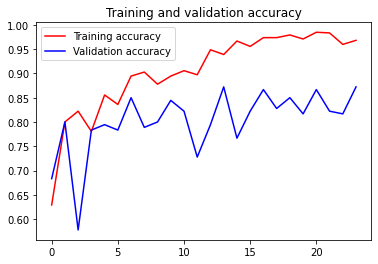

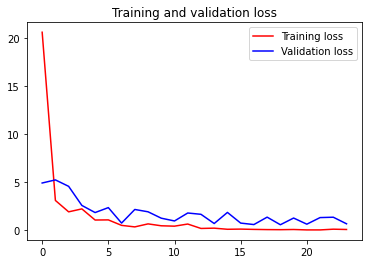

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### **Model 2 (Full Augment)**

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 9.4653 - accuracy: 0.6375 
Epoch 1: val_accuracy improved from -inf to 0.71111, saving model to CapstoneModel.h5
23/23 [==============================] - 932s 40s/step - loss: 9.4653 - accuracy: 0.6375 - val_loss: 2.3004 - val_accuracy: 0.7111
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 5.4040 - accuracy: 0.6792
Epoch 2: val_accuracy improved from 0.71111 to 0.73889, saving model to CapstoneModel.h5
23/23 [==============================] - 139s 6s/step - loss: 5.4040 - accuracy: 0.6792 - val_loss: 2.0725 - val_accuracy: 0.7389
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 3.5045 - accuracy: 0.7028
Epoch 3: val_accuracy improved from 0.73889 to 0.77778, saving model to CapstoneModel.h5
23/23 [==============================] - 136s 6s/step - loss: 3.5045 - accuracy: 0.7028 - val_loss: 2.3335 - val_accuracy: 0.7778
Epoch 4/50
23/23 [==============================] - ETA: 0s - 

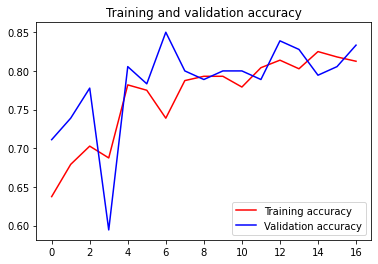

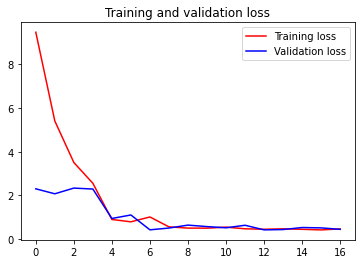

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp298t04j4/assets


## **Model VGG16**

In [ ]:
vgg = VGG16(input_shape=(512, 512, 3), weights='imagenet', include_top=False)

# Freeze the weights of the layers.
for layer in vgg.layers:
  layer.trainable = False

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
inp = vgg.input

x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

model_new = Model(inp, outputs = prediction)

In [ ]:
# for l, layer in enumerate(model_new.layers[:-1]):
#     layer.trainable = False

# for l, layer in enumerate(model_new.layers[-1:]):
#     layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

model_new.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0   

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=20,verbose=1)

### **Model 3 (Full Augment)**

In [ ]:
# Train the model
history = model_new.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=10,
                    callbacks=[checkpoint,earlystop],
                    verbose = 1)

Epoch 1/30
23/23 [==============================] - ETA: 0s - loss: 1.9523 - accuracy: 0.4125
Epoch 1: val_accuracy improved from -inf to 0.32778, saving model to CapstoneModel.h5
23/23 [==============================] - 114s 5s/step - loss: 1.9523 - accuracy: 0.4125 - val_loss: 1.5588 - val_accuracy: 0.3278
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 1.0418 - accuracy: 0.5264
Epoch 2: val_accuracy improved from 0.32778 to 0.68333, saving model to CapstoneModel.h5
23/23 [==============================] - 107s 5s/step - loss: 1.0418 - accuracy: 0.5264 - val_loss: 1.0662 - val_accuracy: 0.6833
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 0.8193 - accuracy: 0.6111
Epoch 3: val_accuracy improved from 0.68333 to 0.77778, saving model to CapstoneModel.h5
23/23 [==============================] - 103s 4s/step - loss: 0.8193 - accuracy: 0.6111 - val_loss: 0.5516 - val_accuracy: 0.7778
Epoch 4/30
23/23 [==============================] - ETA: 0s - lo

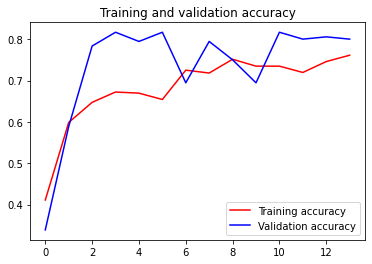

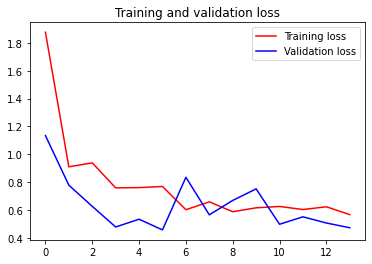

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()